In [38]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [39]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[337,  20],
       [ 30, 182]])

**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정확도는 모델이 전체 예측에서 얼마나 맞췄는지를 나타내는 비율이다.

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.9121265377855887

모델의 전체 예측 중 약 91.2%가 맞았다는 것을 알 수 있다.

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정밀도는 모델이 양성으로 예측한 것 중 실제로 양성인 비율이다.

In [41]:
from sklearn.metrics import precision_score

precision_score(y, y_pred)

0.900990099009901

예측한 양성 중 약 90.0%가 실제로 양성이었다는 것을 알 수 있다.

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

재현율은 실제 양성 샘플 중에서 모델이 얼마나 많이 맞췄는지를 나타낸다.

In [42]:
from sklearn.metrics import recall_score

recall_score(y, y_pred)

0.8584905660377359

실제 양성 샘플 중 약 85.8%를 모델이 올바르게 양성으로 예측했다는 것을 알 수 있다.

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

F1 score는 정밀도와 재현율을 조화평균으로 계산한 지표이다.

In [43]:
from sklearn.metrics import f1_score

f1_score(y, y_pred)

0.8792270531400966

정밀도와 재현율의 균형을 고려했을 때 모델의 양성 예측 성능이 약 87.9%라는 것을 알 수 있다.

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [44]:
from sklearn.preprocessing import Binarizer

y_prob = model_lor.predict_proba(X)

y_proba_0 = y_prob[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.9)
y_pred2 = binarizer.fit_transform(y_proba_0)

In [45]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
cm2 = confusion_matrix(y, y_pred2)
accuracy2 = accuracy_score(y, y_pred2)
precision2 = precision_score(y, y_pred2)
recall2 = recall_score(y, y_pred2)
f1_2 = f1_score(y, y_pred2)

print(cm2)
print(accuracy2)
print(precision2)
print(recall2)
print(f1_2)

[[356   1]
 [ 73 139]]
0.8699472759226714
0.9928571428571429
0.6556603773584906
0.7897727272727273


**ROC 곡선 시각화**

In [46]:
from sklearn.metrics import roc_curve, auc

y_prob = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

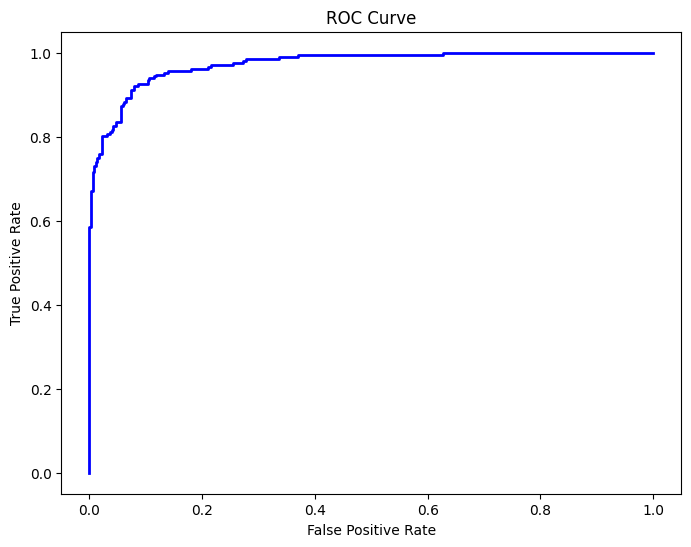

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label="ROC curve = {:.3f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [48]:
roc_auc

np.float64(0.974076423022039)

모델이 양성과 음성을 구분하는 능력이 약 97.4%라는 것을 알 수 있다.